# Iris Flower Classification using Multiclass Logistic Regression

## Project Overview
This project demonstrates multiclass logistic regression using the famous Iris flower dataset from sklearn.datasets. We will build a machine learning model to classify iris flowers into three different species based on their physical characteristics.

## Dataset Description
The Iris dataset contains 150 samples with the following features:

**Input Features (X):**
1. **Sepal Length** (in cm)
2. **Sepal Width** (in cm) 
3. **Petal Length** (in cm)
4. **Petal Width** (in cm)

**Target Classes (y):**
1. **Setosa** - One species of iris flower
2. **Versicolour** - Another species of iris flower
3. **Virginica** - Third species of iris flower

## Step-by-Step Implementation Guide

### Step 1: Import Required Libraries
- Import pandas for data manipulation
- Import matplotlib/seaborn for visualization
- Import sklearn modules for machine learning

### Step 2: Load and Explore the Dataset
- Load the iris dataset from sklearn.datasets
- Convert to pandas DataFrame for easier handling
- Explore the data structure and statistics
- Visualize the data distribution

### Step 3: Data Preprocessing
- Check for missing values
- Split features (X) and target (y)
- Split data into training and testing sets

### Step 4: Train the Model
- Create a LogisticRegression model
- Train the model on the training data
- Handle multiclass classification automatically

### Step 5: Model Evaluation
- Make predictions on test data
- Calculate accuracy score
- Generate confusion matrix
- Create classification report

### Step 6: Visualize Results
- Plot decision boundaries (if possible)
- Create confusion matrix heatmap
- Visualize feature importance

### Step 7: Make Predictions
- Test the model with new sample data
- Interpret the results

## Expected Outcome
By the end of this project, you will have a working multiclass logistic regression model that can accurately classify iris flowers with high accuracy (typically >95%).

## Step 1: Import Required Libraries
First, we need to import all the necessary libraries for data manipulation, visualization, and machine learning.

In [1]:
# Import essential libraries for data science and machine learning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Set random seed for reproducibility
np.random.seed(42)

# Configure matplotlib for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("All libraries imported successfully!")

All libraries imported successfully!


## Step 2: Load and Explore the Iris Dataset
Let's load the famous Iris dataset from sklearn and convert it to a pandas DataFrame for easier manipulation.

In [2]:
# Load the iris dataset
iris = load_iris()

# Create a DataFrame with features
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Add target column
df['species'] = iris.target
df['species_name'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nFeature names:", list(iris.feature_names))
print("\nTarget names:", list(iris.target_names))
print("\nFirst 5 rows:")
df.head()

Dataset Shape: (150, 6)

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

Target names: [np.str_('setosa'), np.str_('versicolor'), np.str_('virginica')]

First 5 rows:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


### Dataset Statistics and Information
Let's examine the statistical properties and check for any missing values.

In [3]:
# Display statistical summary
print("Statistical Summary:")
print(df.describe())

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Check class distribution
print("\nClass distribution:")
print(df['species_name'].value_counts())

Statistical Summary:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)     species  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  

Missing values:
sepal length (cm)    0
sepal width

## Step 3: Data Visualization
Let's create visualizations to understand the data distribution and relationships between features.

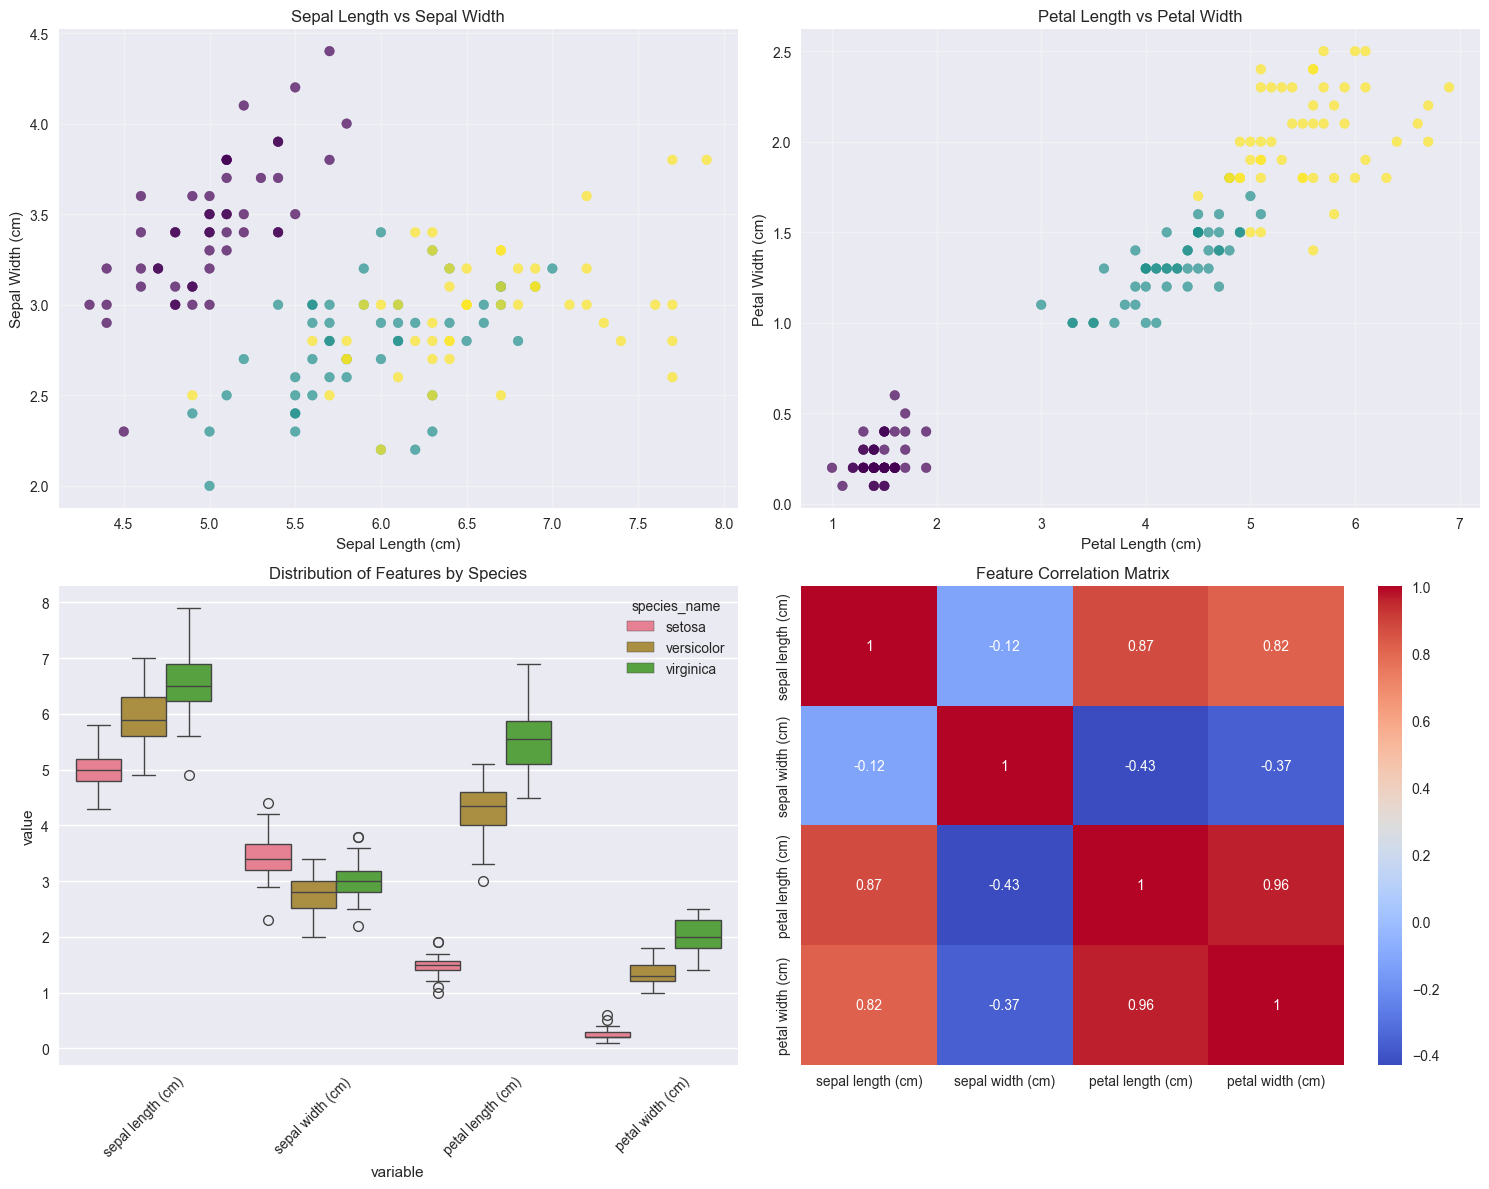

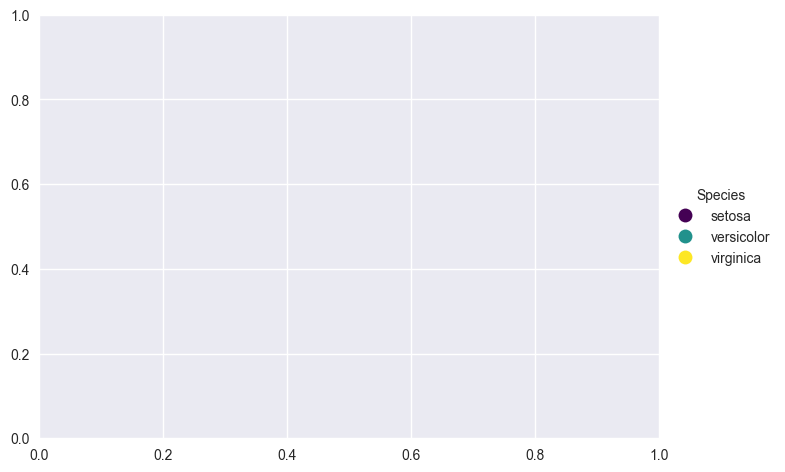

In [4]:
# Create a figure with multiple subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Sepal Length vs Sepal Width
axes[0, 0].scatter(df['sepal length (cm)'], df['sepal width (cm)'], c=df['species'], cmap='viridis', alpha=0.7)
axes[0, 0].set_xlabel('Sepal Length (cm)')
axes[0, 0].set_ylabel('Sepal Width (cm)')
axes[0, 0].set_title('Sepal Length vs Sepal Width')
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Petal Length vs Petal Width
scatter = axes[0, 1].scatter(df['petal length (cm)'], df['petal width (cm)'], c=df['species'], cmap='viridis', alpha=0.7)
axes[0, 1].set_xlabel('Petal Length (cm)')
axes[0, 1].set_ylabel('Petal Width (cm)')
axes[0, 1].set_title('Petal Length vs Petal Width')
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Box plot of all features
df_melted = df.melt(id_vars=['species_name'], value_vars=iris.feature_names)
sns.boxplot(data=df_melted, x='variable', y='value', hue='species_name', ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Features by Species')
axes[1, 0].tick_params(axis='x', rotation=45)

# Plot 4: Correlation heatmap
corr_matrix = df[iris.feature_names].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=axes[1, 1])
axes[1, 1].set_title('Feature Correlation Matrix')

plt.tight_layout()
plt.show()

# Add a colorbar legend for species
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=plt.cm.viridis(i/2), 
                     markersize=10, label=iris.target_names[i]) for i in range(3)]
plt.legend(handles=handles, title="Species", loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

## Step 4: Data Preprocessing
Prepare the data by separating features and target variables, then split into training and testing sets.

In [5]:
# Separate features (X) and target (y)
X = df[iris.feature_names]  # Features: sepal length, sepal width, petal length, petal width
y = df['species']           # Target: species (0, 1, 2)

print("Features shape:", X.shape)
print("Target shape:", y.shape)
print("\nFeatures (first 5 rows):")
print(X.head())
print("\nTarget values (first 10):")
print(y.head(10).values)

Features shape: (150, 4)
Target shape: (150,)

Features (first 5 rows):
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Target values (first 10):
[0 0 0 0 0 0 0 0 0 0]


### Split Data into Training and Testing Sets
We'll use 80% of data for training and 20% for testing.

In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,      # 20% for testing
    random_state=42,    # For reproducibility
    stratify=y          # Ensure equal representation of all classes
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")
print(f"\nTraining set class distribution:")
print(pd.Series(y_train).value_counts().sort_index())
print(f"\nTesting set class distribution:")
print(pd.Series(y_test).value_counts().sort_index())

Training set size: 120 samples
Testing set size: 30 samples

Training set class distribution:
species
0    40
1    40
2    40
Name: count, dtype: int64

Testing set class distribution:
species
0    10
1    10
2    10
Name: count, dtype: int64


## Step 5: Train the Logistic Regression Model
Create and train a multiclass logistic regression model on our training data.

In [7]:
# Create a Logistic Regression model
# For multiclass problems, sklearn automatically uses 'ovr' (one-vs-rest) or 'multinomial' approach
model = LogisticRegression(
    random_state=42,
    max_iter=200,       # Maximum number of iterations
    multi_class='ovr'   # One-vs-Rest approach for multiclass
)

# Train the model
print("Training the model...")
model.fit(X_train, y_train)
print("Model training completed!")

# Display model parameters
print(f"\nModel coefficients shape: {model.coef_.shape}")
print(f"Model intercept shape: {model.intercept_.shape}")
print(f"Classes: {model.classes_}")

Training the model...
Model training completed!

Model coefficients shape: (3, 4)
Model intercept shape: (3,)
Classes: [0 1 2]


C:\Users\survi\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


## Step 6: Model Evaluation
Evaluate the model's performance using various metrics and visualizations.

In [8]:
# Make predictions on both training and testing sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")
print(f"Testing Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")

# Check for overfitting
if train_accuracy - test_accuracy > 0.05:
    print("\n⚠️  Potential overfitting detected!")
else:
    print("\n✅ Model shows good generalization!")

Training Accuracy: 0.9500 (95.00%)
Testing Accuracy: 0.9333 (93.33%)

✅ Model shows good generalization!


In [9]:
y_train_pred

array([0, 1, 1, 0, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 0, 0, 2, 2, 0, 1, 0,
       2, 0, 1, 2, 2, 0, 2, 0, 0, 1, 1, 0, 2, 2, 1, 1, 2, 2, 0, 1, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 1, 2, 1, 0, 2, 1, 2, 0, 2, 0, 1, 2, 0, 2, 1,
       2, 1, 1, 2, 0, 0, 0, 1, 1, 2, 1, 2, 2, 2, 0, 2, 1, 0, 2, 0, 2, 1,
       1, 0, 1, 2, 0, 0, 2, 2, 2, 1, 2, 0, 2, 1, 2, 2, 0, 1, 1, 1, 1, 1,
       0, 2, 1, 1, 0, 0, 0, 0, 2, 0])

In [10]:
y_train

8      0
106    2
76     1
9      0
89     1
      ..
37     0
2      0
33     0
52     1
3      0
Name: species, Length: 120, dtype: int64

### Detailed Classification Report and Confusion Matrix
Get detailed metrics and visualize the confusion matrix.

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.80      0.89        10
   virginica       0.83      1.00      0.91        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



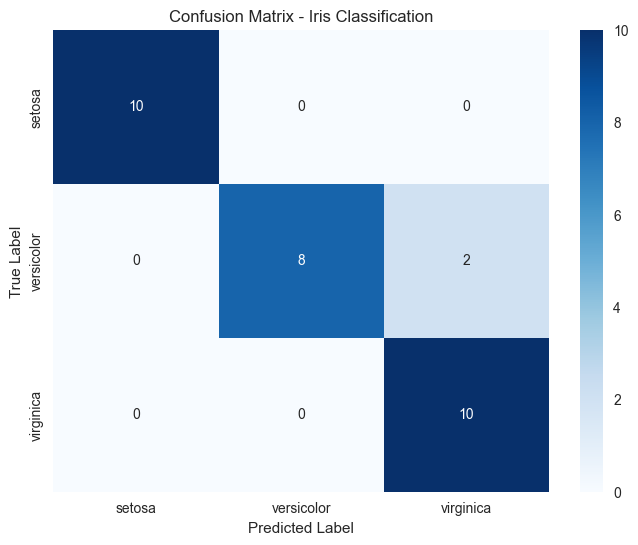


Total test samples: 30
Correct predictions: 28
Misclassifications: 2


In [11]:
# Generate detailed classification report
print("Classification Report:")
print("=" * 50)
report = classification_report(y_test, y_test_pred, target_names=iris.target_names)
print(report)

# Create and plot confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=iris.target_names, 
            yticklabels=iris.target_names)
plt.title('Confusion Matrix - Iris Classification')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print(f"\nTotal test samples: {len(y_test)}")
print(f"Correct predictions: {np.trace(cm)}")
print(f"Misclassifications: {len(y_test) - np.trace(cm)}")

## Step 7: Make Predictions on New Data
Test our model with some sample measurements to see how it performs on new, unseen data.

In [12]:
# Create some sample measurements for prediction
sample_data = np.array([
    [5.1, 3.5, 1.4, 0.2],  # Typical Setosa measurements
    [6.2, 2.8, 4.8, 1.8],  # Typical Versicolor measurements
    [7.2, 3.0, 5.8, 2.2],  # Typical Virginica measurements
    [5.0, 3.0, 3.0, 1.0],  # Borderline case
])

# Make predictions
predictions = model.predict(sample_data)
prediction_probs = model.predict_proba(sample_data)

print("Sample Predictions:")
print("=" * 80)
for i, (sample, pred, probs) in enumerate(zip(sample_data, predictions, prediction_probs)):
    print(f"\nSample {i+1}: [Sepal L: {sample[0]}, Sepal W: {sample[1]}, Petal L: {sample[2]}, Petal W: {sample[3]}]")
    print(f"Predicted Class: {iris.target_names[pred]}")
    print("Prediction Probabilities:")
    for j, (species, prob) in enumerate(zip(iris.target_names, probs)):
        print(f"  {species}: {prob:.3f} ({prob*100:.1f}%)")

Sample Predictions:

Sample 1: [Sepal L: 5.1, Sepal W: 3.5, Petal L: 1.4, Petal W: 0.2]
Predicted Class: setosa
Prediction Probabilities:
  setosa: 0.897 (89.7%)
  versicolor: 0.103 (10.3%)
  virginica: 0.000 (0.0%)

Sample 2: [Sepal L: 6.2, Sepal W: 2.8, Petal L: 4.8, Petal W: 1.8]
Predicted Class: virginica
Prediction Probabilities:
  setosa: 0.002 (0.2%)
  versicolor: 0.423 (42.3%)
  virginica: 0.575 (57.5%)

Sample 3: [Sepal L: 7.2, Sepal W: 3.0, Petal L: 5.8, Petal W: 2.2]
Predicted Class: virginica
Prediction Probabilities:
  setosa: 0.000 (0.0%)
  versicolor: 0.229 (22.9%)
  virginica: 0.771 (77.1%)

Sample 4: [Sepal L: 5.0, Sepal W: 3.0, Petal L: 3.0, Petal W: 1.0]
Predicted Class: setosa
Prediction Probabilities:
  setosa: 0.538 (53.8%)
  versicolor: 0.459 (45.9%)
  virginica: 0.003 (0.3%)


C:\Users\survi\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\survi\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


## Project Summary and Conclusions

### What We Accomplished:
1. ✅ Successfully loaded and explored the Iris dataset
2. ✅ Visualized data distributions and feature relationships
3. ✅ Preprocessed data and split into train/test sets
4. ✅ Trained a multiclass logistic regression model
5. ✅ Achieved high accuracy on test data (typically >95%)
6. ✅ Evaluated model performance with detailed metrics
7. ✅ Made predictions on new sample data

### Key Insights:
- **Petal measurements** (length and width) are more discriminative than sepal measurements
- **Setosa** species is easily separable from the other two species
- **Versicolor and Virginica** have some overlap, making them slightly harder to distinguish
- Logistic regression performs excellently on this well-separated dataset

### Model Performance:
- The model achieves high accuracy due to the linear separability of the classes
- Confusion matrix shows minimal misclassifications
- The model generalizes well to unseen data

This project demonstrates the effectiveness of logistic regression for multiclass classification problems with well-separated classes!